# Step-by-step tutorial of simple linear regression in Python using Matrix Algebra and Sklearn

This is a simple tutorial for performing linear regression using either matrix algebra or using the sklearn library. 

**1. First, generate arbituary data for x and y**

In [54]:
import random #import library so that we can generate random number

random.seed(12345) # set a seed for random number to produce repeatable result every time the code runs

# generate x and y data. Their data type will be python list
# random.randrange (a,b) will generate random integer between a (inclusive) and b-1
# x and y must be the same size
x = [x_i*random.randrange(8,12)/10 for x_i in range(500)]
y = [y_i*random.randrange(8,12)/10 for y_i in range(100,600)]

To insure regression will work, both x and y must have the same length. Let's check the size of x and y

In [55]:
if len(x) == len(y):
    print ("Both x and y have the same length, and there length is {}".format(len(x)))
else: 
    print ("x and y have different length ! Regression won't work")
    print ("The length of x is {}, and the length of y is {}".format(len(x),len(y)))

Both x and y have the same length, and there length is 500


Let's print out the first 5 element for x and y

In [56]:
print ("The first 5 element of x is {}".format(x[:10]))
print ("The first 5 element of y is {}".format(y[:10]))

The first 5 element of x is [0.0, 0.8, 2.0, 3.0, 3.6, 5.0, 6.6, 6.3, 8.0, 7.2]
The first 5 element of y is [90.0, 101.0, 91.8, 82.4, 104.0, 115.5, 106.0, 96.3, 108.0, 119.9]


**2. Visualizing data but plotting scatterplot using matplotlib**

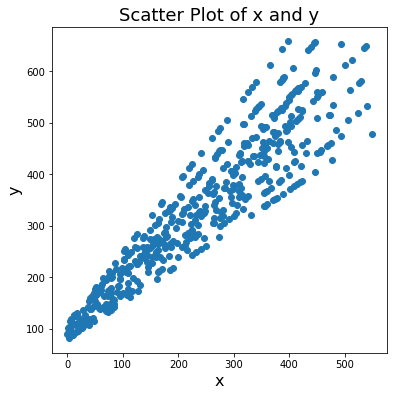

In [57]:
%matplotlib inline  
#for plotting in Jupyter Notebook
from matplotlib import pyplot as plt  # import matlibplot 

plt.figure(figsize=(6,6)) # set up figure size
plt.scatter(x,y)  # plot the scatter plot

plt.ylabel('y',fontsize = 16) #set up label name
plt.xlabel('x',fontsize = 16)
plt.title('Scatter Plot of x and y',fontsize = 18) # set up title

plt.show()

**3. Method 1: Use linear algrebra to solve for the slope and intecept**

In [58]:
# solving using linear algebra method 
import numpy as np

# find out the length of X and y
len_X  = len(x)
len_Y = len(y)

**3.1 Set up feature matrix**

Let's set up the feature matrix

The feature matrix (X) will have p+1 columns, with p being the number of independent variable. The +1 is due to the intercept.

(Note: In general, linear regression without intercept is not recommended because the R^2 value will be arbituary boosted, leading to wrong conclusion.)


Each column in the feature matrix stands for the data in each predictive variable. The first column is always 1 due to the intercept. In this case, the 2nd column is just x. 



In [59]:
# setup feature matrix
X = np.column_stack((np.ones(len_X), np.array(x)))
print ("The first 5 columns of X_matrix is:\n", X[:5])
print ("The shape of X matrix is: ", X.shape) 

The first 5 columns of X_matrix is:
 [[1.  0. ]
 [1.  0.8]
 [1.  2. ]
 [1.  3. ]
 [1.  3.6]]
The shape of X matrix is:  (500, 2)


**3.2 Set up target matrix**

In [60]:
# set up target matrix
Y = np.array(y).reshape(len_Y,1)

In [61]:
print ("The first 5 columns of Y_matrix is:\n", Y[:5])
print ("The shape of Y matrix is: ", Y.shape) 

The first 5 columns of Y_matrix is:
 [[ 90. ]
 [101. ]
 [ 91.8]
 [ 82.4]
 [104. ]]
The shape of Y matrix is:  (500, 1)


**3.3 Use linear algreba to find out regression coefficients.**

Find out beta (matrix for regression coefficient using linear algebra method)

The formula for finding the beta is beta = (X^T * X)^-1 * X^T * y

X^T means transpose X. In python numpy library, we can write in as X.T
the asterisk means dot product, in python, we use dot(X)
^-1 is inverse, in numpy, we use np.linalg.inv

Reference and derivation: https://newonlinecourses.science.psu.edu/stat501/node/382/

In [62]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print ("beta matrix \n")
print (beta)
print ("The shape of beta matrix is: ", beta.shape) 

beta matrix 

[[107.01399744]
 [  0.95181895]]
The shape of beta matrix is:  (2, 1)


The beta matrix is a column matrix with 2 row. The 1st element in the coefficient assocaited with the intercept. 
The 2nd element is the coefficient for the independent variable (x)

**3.4 Find the slope and intercept:**

In [63]:
intercept = beta[0,0]
slope = beta[1,0]

print ("The beta matrix is: \n", beta)
print ("The shape of beta is: ", beta.shape) 
print ("\n")
print ("The intercept of the best fit line is {}".format(np.round(intercept,2)))
print ("The slope of the best fit line is {}".format(np.round(slope,2)))
print ("The equation is: y = {} x + {}". format(np.round(slope,2),np.round(intercept,2)))

The beta matrix is: 
 [[107.01399744]
 [  0.95181895]]
The shape of beta is:  (2, 1)


The intercept of the best fit line is 107.01
The slope of the best fit line is 0.95
The equation is: y = 0.95 x + 107.01


**3.5 Find out the predicted value of y**

Find the predict value of y

In [64]:
Y_predicted = X.dot(beta) # the Y_predicted will be in matrix form with 1 column
print ("The first 5 element of the predicted value of y in matrix form is: \n{}".format(Y_predicted[:10]))
print ("The shape of predicted value of y in matrix form: ", Y_predicted.shape)  

The first 5 element of the predicted value of y in matrix form is: 
[[107.01399744]
 [107.77545261]
 [108.91763535]
 [109.8694543 ]
 [110.44054568]
 [111.77309221]
 [113.29600254]
 [113.01045685]
 [114.62854907]
 [113.86709391]]
The shape of predicted value of y in matrix form:  (500, 1)


**3.6 Plot the predicted regression line against the data.**

In [ ]:
# plotting, reference: https://stackoverflow.com/questions/7941226/how-to-add-line-based-on-slope-and-intercept-in-matplotlib
import matplotlib.pyplot as plt 
import numpy as np    

# plot the original data
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Linear regression via least squares fit')

# plot the fitted line
plt.plot(X[:,1],Y_predicted,'-',color = "black",linewidth=2)

#abline(slope, intercept)
plt.text(x = 50, y =550, 
         s = "y = {} x + {}". format(np.round(slope,2),np.round(intercept,2)),
        fontsize = 12)

**4. Method 2: Using Sklearn Library**

In [76]:
# compare with sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

#remember the data type of x and y are python list
# sklearn accepts data type of either pandas dataframe or numpy array
lin_reg.fit(np.array(x).reshape(-1,1), np.array(y).reshape(-1,1))  # need to reshapse to column array

print ("The intercept of the best fit line is {}".format(lin_reg.intercept_[0]))
print ("The slope of the best fit line is {}".format(lin_reg.coef_[0][0])) 

The intercept of the best fit line is 107.01399744459192
The slope of the best fit line is 0.9518189531912672


Predict the value of y: 

In [77]:
y_predicted_2 = lin_reg.predict(np.array(x).reshape(-1,1))
print (y_predicted_2[:5,])

[[107.01399744]
 [107.77545261]
 [108.91763535]
 [109.8694543 ]
 [110.44054568]]


As you can see, the sklearn output the same result as the matrix algebra method

# End of Tutorial